<a href="https://colab.research.google.com/github/juliosdutra/ModelagemPPEQ1019/blob/main/CSTR_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Created on Tue Mar 10 11:16:09 2020

@author: JulioDutra
"""

#%% Carregar as bibliotecas e módulos necessários.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
#%% Ler os dados e realizar verificações básicas.

# URL direta para o arquivo XLS no GitHub
url = "https://github.com/juliosdutra/ModelagemPPEQ1019/raw/refs/heads/main/cstr_dados.xlsx"

# Lê o arquivo XLS usando pandas
arquivo = pd.read_excel(url)
dados = arquivo[['Vazao','Conc_inicial','Volume', 'Conc_A', 'Conc_B']]

X = dados[['Vazao','Conc_inicial','Volume']]
y = dados[['Conc_A', 'Conc_B']]

print(X.shape)
print(y.shape)

(200, 3)
(200, 2)


In [3]:
#%% Adimensionalizar ou padronizar os dados.

# Escalonar os dados, entrada
s1 = MinMaxScaler(feature_range=(-1,1))
Xs = s1.fit_transform(X)

# Escalonar os dados, saída
s2 = MinMaxScaler(feature_range=(-1,1))
Ys = s2.fit_transform(y)


In [5]:
#%% Criar os conjuntos de dados de treinamento e teste.

X_treino, X_teste, y_treino, y_teste = train_test_split(Xs, Ys,
                                                        test_size = 0.30,
                                                        random_state=2020)

#%% Construir, predizer e avaliar o modelo de rede neural.

rede = MLPRegressor(solver='adam', alpha=1e-5, activation = 'logistic',
                     hidden_layer_sizes=(30, 20), max_iter=10000,
                     random_state=111)

modelo = rede.fit(X_treino,y_treino)

y_pred_treino = modelo.predict(X_treino)

y_pred_teste = modelo.predict(X_teste)

print('Fobj: %.3f'  % modelo.loss_)
r2_treino = r2_score(y_treino, y_pred_treino)
r2_teste = r2_score(y_teste, y_pred_teste)
print('R2-score %.3f (treino)' %  r2_treino)
print('R2-score %.3f (teste)' %  r2_teste)

r2_teste_A = r2_score(y_teste[:,0], y_pred_teste[:,0])
r2_teste_B = r2_score(y_teste[:,1], y_pred_teste[:,1])

# Rescalar os dados
X_treino = s1.inverse_transform( X_treino )
X_teste = s1.inverse_transform( X_teste )

y_treino = s2.inverse_transform( y_treino )
y_pred_treino = s2.inverse_transform( y_pred_treino )
y_pred_teste = s2.inverse_transform( y_pred_teste )


Fobj: 0.007
R2-score 0.940 (treino)
R2-score 0.963 (teste)


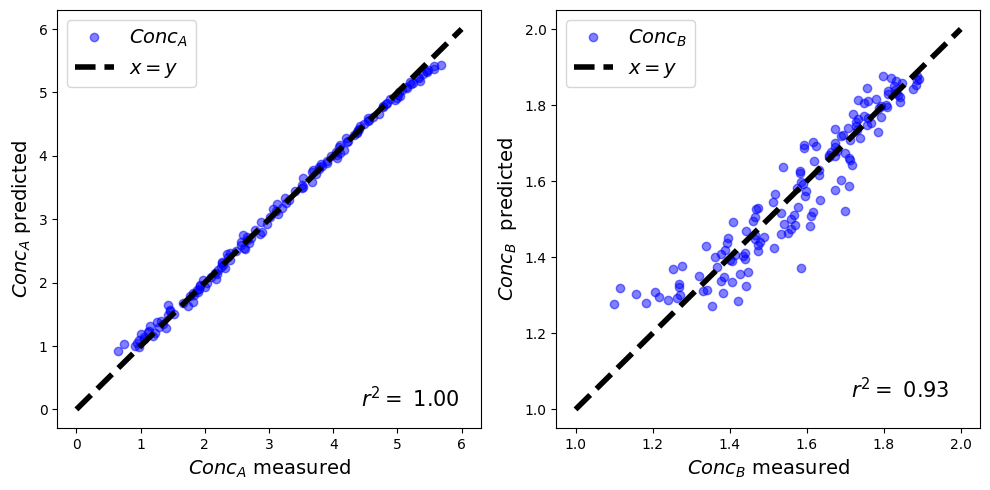

In [7]:
# %% Resultados

m,n = max(y_treino[:,0]), min(y_treino[:,0])
diag1 = np.linspace(np.floor(n),np.ceil(m),100)

m,n = max(y_treino[:,1]), min(y_treino[:,1])
diag2 = np.linspace(np.floor(n),np.ceil(m),100)

plt.figure(1, figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(y_treino[:,0],y_pred_treino[:,0],'ob', alpha=0.50, label=r'$Conc_A$')
plt.plot(diag1, diag1,'--k', lw=4, label=r'$x=y$')
plt.xlabel(r'$Conc_A$ measured', fontsize=14, color='k')
plt.ylabel(r'$Conc_A$ predicted', fontsize=14, color='k')
plt.legend(fontsize=14)
plt.text(diag1.max() - .03, diag1.min() + .03,
         (r'$r^2 =$ %.2f' % r2_teste_A).lstrip('0'),
         size=15, horizontalalignment='right')

plt.subplot(1,2,2)
plt.plot(y_treino[:,1],y_pred_treino[:,1],'ob', alpha=0.50, label=r'$Conc_B$')
plt.plot(diag2, diag2,'--k', lw=4, label=r'$x=y$')
plt.xlabel(r'$Conc_B$ measured', fontsize=14, color='k')
plt.ylabel(r'$Conc_B$  predicted', fontsize=14, color='k')
plt.legend(fontsize=14)
plt.text(diag2.max() - .03, diag2.min() + .03,
         (r'$r^2 =$ %.2f' % r2_teste_B).lstrip('0'),
         size=15, horizontalalignment='right')
plt.tight_layout()

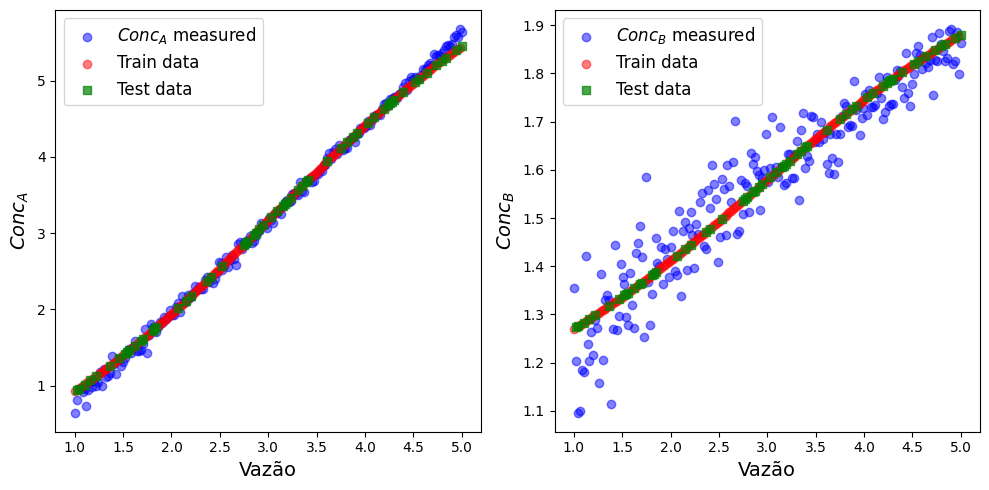

In [8]:
plt.figure(2, figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X.Vazao, y.Conc_A,  color='blue', alpha=0.50, label = r'$Conc_A$ measured')
plt.scatter(X_treino[:,0], y_pred_treino[:,0], alpha=0.50, color='red', label = 'Train data')
plt.scatter(X_teste[:,0], y_pred_teste[:,0],marker='s', alpha=0.70, color='green', label = 'Test data')
plt.xlabel(r'Vazão', fontsize=14, color='k')
plt.ylabel(r'$Conc_A$', fontsize=14, color='k')
plt.legend(fontsize=12)

plt.subplot(1,2,2)
plt.scatter(X.Vazao, y.Conc_B,  color='blue', alpha=0.50, label = r'$Conc_B$ measured')
plt.scatter(X_treino[:,0], y_pred_treino[:,1], alpha=0.50, color='red', label = 'Train data')
plt.scatter(X_teste[:,0], y_pred_teste[:,1], marker='s', alpha=0.70, color='green', label = 'Test data')
plt.xlabel(r'Vazão', fontsize=14, color='k')
plt.ylabel(r'$Conc_B$', fontsize=14, color='k')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Text(0, 0.5, '$F_{obj}$')

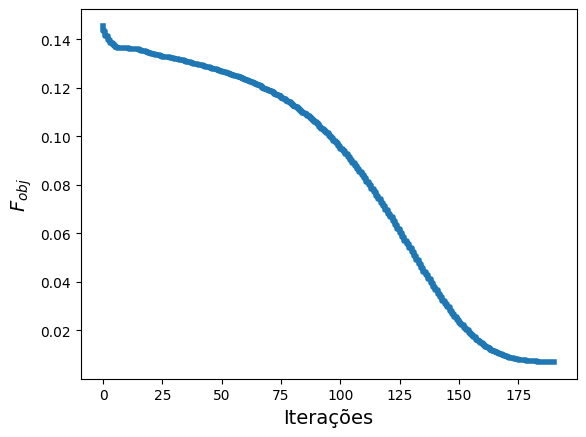

In [9]:
plt.figure(3)
Loss = modelo.loss_curve_
plt.step(range(modelo.n_iter_),Loss, lw=4)
plt.xlabel('Iterações', fontsize=14, color='k')
plt.ylabel(r'$F_{obj}$', fontsize=14, color='k')

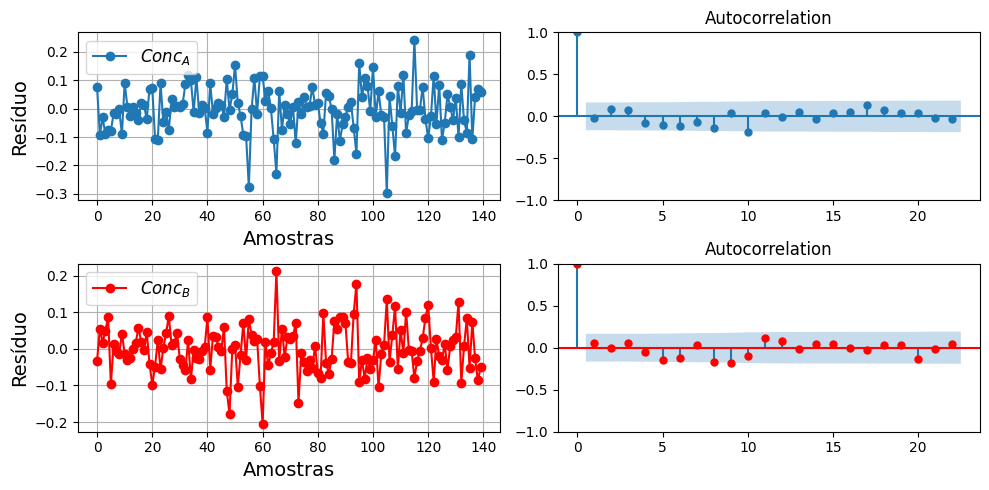

In [10]:
plt.figure(4,figsize=(10,5))
res = y_treino - y_pred_treino

plt.subplot(2,2,1)
plt.plot(range(0,len(y_treino)),res[:,0],'o-', label=r'$Conc_A$')
plt.xlabel('Amostras', fontsize=14, color='k')
plt.ylabel('Resíduo', fontsize=14, color='k')
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(2,2,2)
plot_acf(res[:,0], ax=ax)

plt.subplot(2,2,3)
plt.plot(range(0,len(y_treino)),res[:,1],'o-r', label=r'$Conc_B$')
plt.xlabel('Amostras', fontsize=14, color='k')
plt.ylabel('Resíduo', fontsize=14, color='k')
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(2,2,4)
plot_acf(res[:,1], color ='red',ax=ax)

plt.tight_layout()
plt.show()
